# **M2 BIM - GPOP project**

Project by: _Yann ZHONG_

Student ID: _28710333_


In [268]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import statistics
import random
from itertools import groupby

### **GPOP: simulating an evolving population**
The **objective of the project** is the simulation of a simple population-genetics model to observe
the influence of genetic drift, mutations, selection and population structure on the evolution of
the population. The simulations will be done using a **clonal version of the Wright-Fisher model**:

    - The population is formed by N haploid individuals, each one carrying one allele for a given locus.
    - The population evolves with constant population size and discrete non-overlapping generations.
    - Each individual in generation t+1 is a copy of a randomly selected individual in generation t.

According to the situation to be studied, the selection can be fitness dependent, or mutations
between parent and offspring may appear with some mutation rate.

### **1) Genetic drift**
Study a finite population without selection and mutation, but initialized with two different
alleles A and B having allele frequencies p and q = 1 – p. Simulate the population to (a)
trace the allele frequencies over time; (b) determine the fixation probability of allele A in
dependence of p; (c) estimate the expected fixation time (number of generations) in
dependence of N. Simulation results are to be compared to the analytical results derived in
the lectures.

**Note 1**: The analytical results in the lectures concern probabilities and expectation values.
To enable a comparison, the evolution of the population has to be simulated several times,
with identical initialisation but different realisations of the random parent selections, to
estimate empirical fractions and averages.

**Note 2**: When comparing to analytical results, you have to consider that the simulated
population is a clonal population of N alleles, not a population of diploid individuals with 2N
alleles.

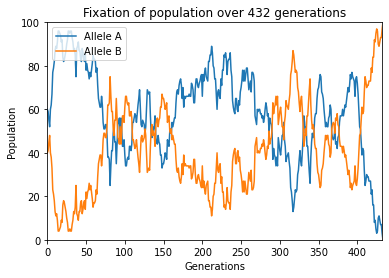

In [248]:
# ----- Initialize simulation variables ----- # 

p = 0.6               # Allele A probability
q = 1-p               # Allele B probability
generations = 750     # Around > 250 seems decent, otherwise don't always get fixation
population = 100                     

# ----- Clonal non diploid population simulation function ----- #                              

def clonal_population(p,q,generations,population):

    p_population = p*population     # Only for initial p population
    q_population = q*population     # Only for initial p population
    whole_pop_distribution = []     # Empty list for storing all subsequent iterations

    fixation_time = 0               # Generation when one allele has dominated and the other disappeared

    current_pop_distribution = [p_population,q_population]
    whole_pop_distribution.append(current_pop_distribution)

    for i in range(generations):                             # Iterate a set number of generations
        
        current_pop_distribution = [0 for i in range(2)]     # Empty list each iteration
        p = whole_pop_distribution[i][0]                     # Get new probability based on last generation
        q = 1-p

        for j in range(population):                          # For every member of population,               
            if np.random.random()*population < p:            # Use np.random to determine allele
                current_pop_distribution[0] += 1             # We have picked A as RNG < p
            else:
                current_pop_distribution[1] += 1             # We have picked B as RNG > p
        whole_pop_distribution.append(current_pop_distribution)

        if current_pop_distribution[0]*current_pop_distribution[1] == 0:    # If product of p and q is 0
            break                                                           # Get fixation time, and break

        fixation_time+=1                                     # Increment fixation time if we haven't reached fixation

    return whole_pop_distribution,fixation_time              # Return a list of length = fixation time that has reached fixation + the fixation time

distribution,fix_time = clonal_population(p,q,generations,population)       # Gets one instance of a distribution
distribution_list_p = [p[0] for p in distribution]                          # Get all "p" elements
distribution_list_q = [q[1] for q in distribution]                          # Get all "q" elements

ax1 = plt.axes (xlim=(0,fix_time),ylim=(0,population))                      # Limit axes for better view
plt.xlabel("Generations")
plt.ylabel("Population")
plt.title("Fixation of population over "+str(fix_time)+" generations")

gen = np.arange(0,fix_time+2,1)
plt.plot(gen,distribution_list_p,label="Allele A")
plt.plot(gen,distribution_list_q,label="Allele B")
plt.legend(loc="upper left")

plt.show()

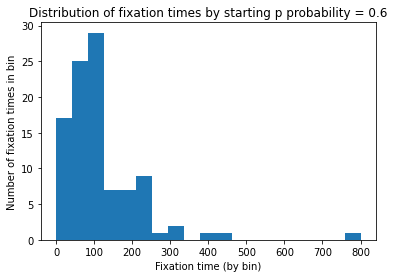

In [251]:
# APPROXIMATION OF FIXATION TIME ON P = 0.6 - DONE ONLY ONCE
# ----- Initialize simulation variables ----- # 

p = 0.6               # Allele A probability
q = 1-p               # Allele B probability
generations = 800     # Around > 500 seems decent, otherwise don't always get fixation
population = 100     
simulations = 100

# Run the simulation with same parameters a large number of times to get average on fixation time
# Potentially plot fixation time versus p to get a sense of  

def get_fixation_times(p,q,generations,population,simulations):    # Gets average fixation time based on nb of simulations
    all_fix_times = []
    for i in range(simulations):

        distribution,fix_time = clonal_population(p,q,generations,population) 
        all_fix_times.append(fix_time)

    return all_fix_times

all_fix = get_fixation_times(p,q,generations,population,simulations)

# Plot on a histogram
HIST_BINS = np.linspace(0, generations, 20)     # What is the best number of bins?
n, _ = np.histogram(all_fix, HIST_BINS)

plt.hist(all_fix,HIST_BINS)
plt.xlabel("Fixation time (by bin)")
plt.ylabel("Number of fixation times in bin")
plt.title("Distribution of fixation times by starting p probability = 0.6")
plt.show()

[67, 91.07, 125.01, 122.96, 143.3, 136.59, 114.95, 101.72, 57.83]


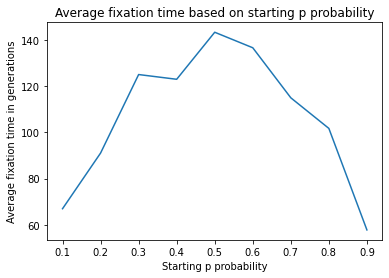

In [262]:
# APPROXIMATION OF FIXATION TIME ON P GOING FROM 0.1 TO 0.9, DONE TEN (OR MORE) TIMES
p_range = np.arange(0.1,1,0.1)      # Test probs from 0.1 to 0.9 in increments (9 items in list)
q_range = 1 - p_range               # 0.9 to 0.1 (not useful here, though)

generations = 800 
population = 100     
simulations = 100

all_fix_list = [get_fixation_times(p_range[i],q_range[i],generations,population,simulations) for i in range(9)]

nine_fixation_means = [statistics.mean(i) for i in all_fix_list]     # Get the mean of the fixation time for every starting probability p
print(nine_fixation_means)

plt.figure()
plt.plot(p_range,nine_fixation_means)
plt.xlabel("Starting p probability")
plt.ylabel("Average fixation time in generations")
plt.title("Average fixation time based on starting p probability")
plt.show()

[144.07, 262.38, 453.51, 440.01, 539.05, 537.98, 632.94, 643.95, 660.95, 745.16]


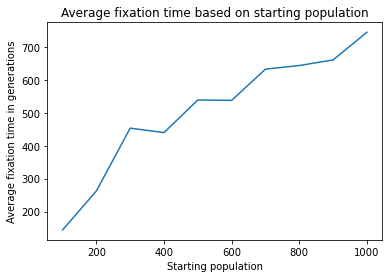

In [264]:
# APPROXIMATION OF FIXATION TIME ON POPULATION GOING FROM 100 TO 1000
p = 0.6      
q = 1 - p  

generations = 800 
population_range = np.arange(100,1001,100)   # Test based on population going from 100 to 1000 (increments of 100)
simulations = 100

all_fix_list = [get_fixation_times(p,q,generations,population_range[i],simulations) for i in range(len(population_range))]

ten_fixation_means = [statistics.mean(i) for i in all_fix_list]     # Get the mean of the fixation time for every starting probability p
print(ten_fixation_means)

plt.figure()
plt.plot(population_range,ten_fixation_means)
plt.xlabel("Starting population")
plt.ylabel("Average fixation time in generations")
plt.title("Average fixation time based on starting population")
plt.show()

### **1) Genetic drift - answers and remarks**
Type in answers here when done.

### **2) Coalescent model**
Simulate a population of N = 100 individuals until all alleles are identical by descent. Select
several random samples of size n = 2,3,4,5 from the population and measure the number of
generations to the most recent ancestor. Are these consistent with the analytical
expressions for the expectations E(T_n) ? Note again in this analysis, that our population now
has N alleles and not 2N.

In [892]:
population = 100 
p = 0.6
q = 1-p

def all_equal(iterable):                                         # Function to check if all elements in group are the same
    g = groupby(iterable)
    return next(g, True) and not next(g, False) 

def coalescent_model(p,q,population):

    # Populate initial population of 100 with two alles A and B with probability p and q
    allele_pop = list(np.ones(int(p*population)))               # Populate A
    second_allele_pop = list(np.zeros(int(q*population)))       # Populate B
    [allele_pop.append(i) for i in second_allele_pop]           # Join A and B to form whole first generation of population

    whole_allele_pop = []
    whole_allele_pop.append(allele_pop)                         # Append in, to be subsequently filled with every generation
    whole_ancestor_indexes = []

    generation_counter = 0

    while True:

        ancestor_indexes = list(np.zeros(population))           # Will contain N-1 sublists of ancestors
        generation_counter += 1
        current_allele_pop = []                                 

        prev_allele_pop = whole_allele_pop[generation_counter-1].copy()

        for j in range(population):
            allele_choice_index = random.choice(range(len(prev_allele_pop)))      # Randomly choose from previous generation, no biases
            ancestor_indexes[j] = allele_choice_index                             
            current_allele_pop.append(prev_allele_pop[allele_choice_index])       # Append into current list of indexes
        
        whole_allele_pop.append(current_allele_pop)                               # Append into global list
        whole_ancestor_indexes.append(ancestor_indexes)                           # Append into global list

        if all_equal(current_allele_pop) == True:                                 # If we have reached identity by descent
            print("Identity by descent found at "+str(generation_counter)+" generations")
            break

    return whole_allele_pop,whole_ancestor_indexes

test = coalescent_model(p,q,population)
# print(test[0])
# print(test[1][len(test[1])])

Identity by descent found at 101 generations


In [954]:
samples_nb = 3           # Has to be < population; example would be 2/3/4/5 within a population of 100

def find_MRCA(ancestor_indexes,samples_nb):     # The indexes should suffice, the entire population alleles is not necessary for this function
    
    # common_ancestor_search_index = []         # Updateable list to hold indexes of "common ancestry searches"
    # common_ancestor_search_values = []        # Updateable list to hold values @ indexes of "common ancestry searches"

    # Use replace = False to not get repeat selections from sample
    common_ancestor_search_index = np.random.choice( range(len(ancestor_indexes[1][len(ancestor_indexes[1])-1])), samples_nb, replace = False )
    common_ancestor_search_values = list(ancestor_indexes[1][len(ancestor_indexes[1])-1][i] for i in common_ancestor_search_index)

    print("Candidates for random selection are at indexes: "+str(common_ancestor_search_index) + " of last generation")
    print("Respective ancestors from last generation are "+ str(common_ancestor_search_values))

    MRCA_count = 1

    while True:                                           # Search for common ancestor loop
        if(all_equal(common_ancestor_search_values)):     # Requires use of previously defined all_equal function (see above coalescent_model function)
            print("Common ancestor found after "+ str(MRCA_count) +" iterations")         # 1 iteration being the minimum
            break
        if MRCA_count == ( len(ancestor_indexes[1]) ):    # If we have reached all the way back to the first generation
            print("No common ancestor found up till first generation")
            break

        unique_current_gen_values = list(dict.fromkeys(common_ancestor_search_values))   # Converting to dict then back to list removes any non unique element
        common_ancestor_search_index = unique_current_gen_values                         # For ex we go from [0 1 1] to [0 1], which are indexes we need to look at one generation back
        common_ancestor_search_values = list(ancestor_indexes[1][len(ancestor_indexes[1])-1-MRCA_count][i] for i in common_ancestor_search_index)

        MRCA_count +=1        # Increment time taken to find MCRA

    return common_ancestor_search_index,common_ancestor_search_values,MRCA_count


print(find_MRCA(test,samples_nb))

Candidates for random selection are at indexes: [78  6 90] of last generation
Respective ancestors from last generation are [28, 36, 49]
Common ancestor found after 46 iterations
([41, 30], [52, 52], 46)


### **2) Coalescent model**
The analytical expressions for expectation E(Tn) is given as 4N/[n*(n-1)].
With our initial population of N = 100 for starting population, the following plot shows the 

### **3) Mutations in the infinite-allele model**
Start from an initially homogeneous population of N identical alleles. Simulate the population
as described before, but with a mutation rate μ measured in mutations / allele / generation.
Each mutation leads to a new allele. Trace the fixation index (probability that two randomly
chosen alleles are identical) over time. Is the result coherent with the balance between
genetic drift and mutation derived in the lectures?